<a href="https://colab.research.google.com/github/S10143806H/DimRed/blob/master/DimensionalityReduction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction on LFW Dataset

In this notebook, we will demonstrate the use of PCA and LDA for dimensionality reduction on the LFW (Labeled Faces in the Wild) dataset. We will use the reduced features for classification using a Support Vector Machine (SVM) classifier.


## Import necesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Define mahalanobis classifier used for PCA and LDA accuracy evaluation

In [ ]:
def mahalanobis_classifier(X_train, y_train, X_test, y_test):
    unique_labels = np.unique(y_train)
    cov_matrices = {}
    means = {}
    cov_inv = {}

    # Calculate the class covariance matrices and mean values
    for label in unique_labels:
        data = X_train[y_train == label]
        cov_matrices[label] = np.cov(data.T)
        means[label] = np.mean(data, axis=0)
        cov_inv[label] = np.linalg.pinv(cov_matrices[label])

    # Perform classification using minimum Mahalanobis distance
    y_pred = []
    for x in X_test:
        distances = []
        for label in unique_labels:
            distance = mahalanobis(x, means[label], cov_inv[label])
            distances.append(distance)
        y_pred.append(unique_labels[np.argmin(distances)])

    return np.array(y_pred)

## Step 1: Dataset Importing and Preprocessing
* LFW dataset
  * grayscale images 
  * pre-labeled faces 
  * 250 x 250 pixels

In [ ]:
# Pre processing
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.5)

X = lfw_people.data
y = lfw_people.target
n_classes = lfw_people.target_names.shape[0]
component = 30

print("Number of features:", X.shape[1])
print("Number of datasets (samples):", y.shape[0])
print("Number of classes: ", n_classes)

Number of features: 2914
Number of datasets (samples): 2588
Number of classes:  42


## Step 2: Dataset Splitting and Normalization
- Traning set: 80%
- Test set: 20%
- Randomlly shuffled before splitting
- Standard Scaler normalization

In [ ]:
# Split training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Dimensionality Reduction via PCA and LDA

In [ ]:
# PCA
error_rates_pca = []
for n_components_pca in range(component, 1, -1):
    pca = PCA(n_components=n_components_pca, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    y_pred_pca = mahalanobis_classifier(
        X_train_pca, y_train, X_test_pca, y_test)
    error_rate_pca = 1 - np.sum(y_pred_pca == y_test) / len(y_test)
    error_rates_pca.append(error_rate_pca)
    print(
        f"PCA Error Rate with {n_components_pca} components:", error_rate_pca)

# LDA
error_rates_lda = []
for n_components_lda in range(component, 1, -1):
    lda = LDA(n_components=n_components_lda)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    y_pred_lda = mahalanobis_classifier(
        X_train_lda, y_train, X_test_lda, y_test)
    error_rate_lda = 1 - np.sum(y_pred_lda == y_test) / len(y_test)
    error_rates_lda.append(error_rate_lda)
    print(
        f"LDA Error Rate with {n_components_lda} components:", error_rate_lda)


PCA Error Rate with 30 components: 0.971900826446281
PCA Error Rate with 29 components: 0.9669421487603306
PCA Error Rate with 28 components: 0.9735537190082645
PCA Error Rate with 27 components: 0.9702479338842975
PCA Error Rate with 26 components: 0.9537190082644628
PCA Error Rate with 25 components: 0.9421487603305785
PCA Error Rate with 24 components: 0.915702479338843
PCA Error Rate with 23 components: 0.8677685950413223
PCA Error Rate with 22 components: 0.8413223140495868
PCA Error Rate with 21 components: 0.8
PCA Error Rate with 20 components: 0.7603305785123967
PCA Error Rate with 19 components: 0.7404958677685951
PCA Error Rate with 18 components: 0.7008264462809917
PCA Error Rate with 17 components: 0.687603305785124
PCA Error Rate with 16 components: 0.6859504132231404
PCA Error Rate with 15 components: 0.6727272727272727
PCA Error Rate with 14 components: 0.7024793388429752
PCA Error Rate with 13 components: 0.7090909090909091
PCA Error Rate with 12 components: 0.735537190

## Step 5: Applying SVM Model

In [ ]:
# PCA
error_rates_pca_model = []
for n_components_pca in range(component, 1, -1):
    pca = PCA(n_components=n_components_pca, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # SVM on PCA-reduced data
    clf_pca = SVC(kernel='linear', C=1)
    clf_pca.fit(X_train_pca, y_train)
    y_pred_pca = clf_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    error_rate_pca_model = 1 - accuracy_pca
    error_rates_pca_model.append(error_rate_pca_model)
    print(
        f"PCA Model Error Rate with {n_components_pca} components:", error_rate_pca_model)

# LDA
error_rates_lda_model = []
for n_components_lda in range(component, 1, -1):
    lda = LDA(n_components=n_components_lda)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    # SVM on LDA-reduced data
    clf_lda = SVC(kernel='linear', C=1)
    clf_lda.fit(X_train_lda, y_train)
    y_pred_lda = clf_lda.predict(X_test_lda)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)
    error_rate_lda_model = 1 - accuracy_lda
    error_rates_lda_model.append(error_rate_lda_model)
    print(
        f"LDA Model Error Rate with {n_components_lda} components:", error_rate_lda_model)

PCA Model Error Rate with 30 components: 0.5008264462809917
PCA Model Error Rate with 29 components: 0.5206611570247934
PCA Model Error Rate with 28 components: 0.5338842975206611
PCA Model Error Rate with 27 components: 0.5421487603305786
PCA Model Error Rate with 26 components: 0.5553719008264463
PCA Model Error Rate with 25 components: 0.5537190082644627
PCA Model Error Rate with 24 components: 0.5553719008264463
PCA Model Error Rate with 23 components: 0.5652892561983471
PCA Model Error Rate with 22 components: 0.568595041322314
PCA Model Error Rate with 21 components: 0.578512396694215
PCA Model Error Rate with 20 components: 0.5801652892561984
PCA Model Error Rate with 19 components: 0.5917355371900826
PCA Model Error Rate with 18 components: 0.5950413223140496
PCA Model Error Rate with 17 components: 0.631404958677686
PCA Model Error Rate with 16 components: 0.631404958677686
PCA Model Error Rate with 15 components: 0.6181818181818182
PCA Model Error Rate with 14 components: 0.6

## Train and evaluate a Support Vector Machine (SVM) classifier

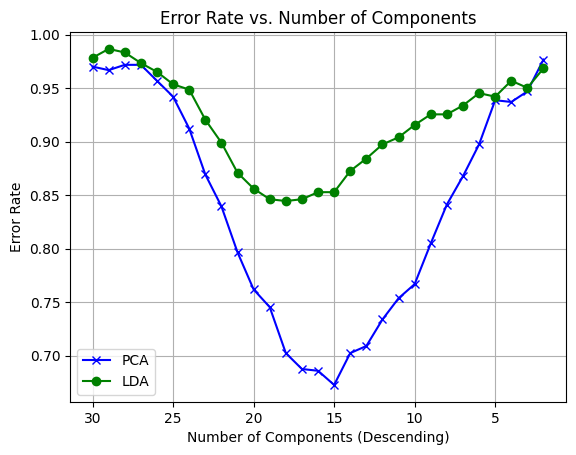

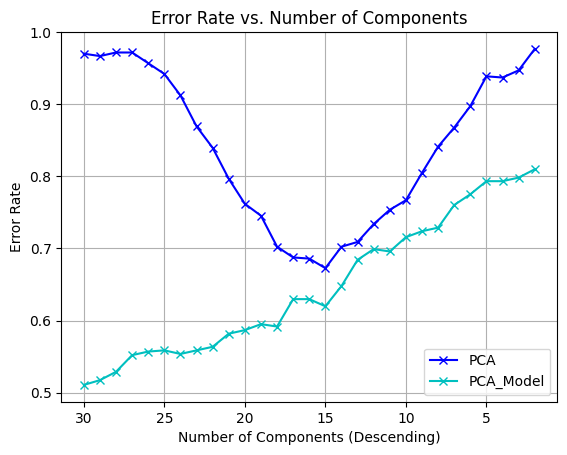

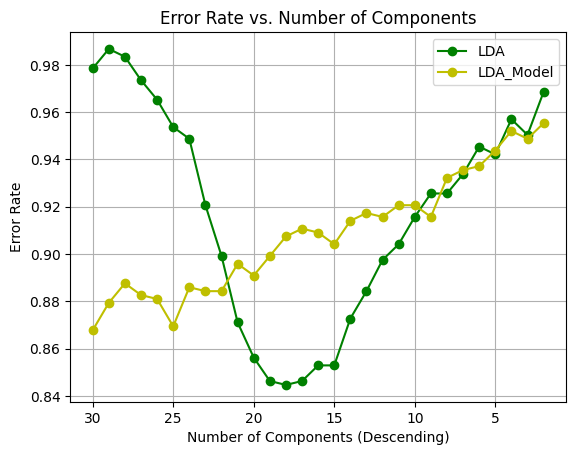

In [ ]:
# Plot the accuracies
plt.plot(range(component, 1, -1), error_rates_pca, marker='x', color='b', label='PCA')
plt.plot(range(component, 1, -1), error_rates_lda, marker='o', color='g', label='LDA')
plt.xlabel('Number of Components (Descending)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Components')
plt.legend()
plt.grid()
plt.gca().invert_xaxis()
plt.show()

# Plot the accuracies
plt.plot(range(component, 1, -1), error_rates_pca, marker='x', color='b', label='PCA')
plt.plot(range(component, 1, -1), error_rates_pca_model, marker='x', color='c', label='PCA_Model')
plt.xlabel('Number of Components (Descending)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Components')
plt.legend()
plt.grid()
plt.gca().invert_xaxis()
plt.show()

# Plot the accuracies
plt.plot(range(component, 1, -1), error_rates_lda, marker='o', color='g', label='LDA')
plt.plot(range(component, 1, -1), error_rates_lda_model, marker='o', color='y', label='LDA_Model')
plt.xlabel('Number of Components (Descending)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Components')
plt.legend()
plt.grid()
plt.gca().invert_xaxis()
plt.show()



---

